## By Position

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import time
import os
import requests 

import pandas as pd
from pandas import DataFrame, read_csv
import scipy as sc
import numpy as np
import seaborn as sns

import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [2]:
regularTotSeason = pd.read_csv('Data/CSV Files/Database/first82TotSeasons.csv')
playoffTotSeason = pd.read_csv('Data/CSV Files/Database/playoffTotSeasons.csv')

regularAVGSeason = pd.read_csv('Data/CSV Files/Database/first82AVGSeasons.csv')
playoffAVGSeason = pd.read_csv('Data/CSV Files/Database/playoffAVGSeasons.csv')

careerTotPlayer = pd.read_csv('Data/CSV Files/Database/CareerTotPlayer.csv')
careerAVGPlayer = pd.read_csv('Data/CSV Files/Database/CareerAVGPlayer.csv')
moreInfoPlayer = pd.read_csv('Data/CSV Files/Database/MoreInfoPerPlayer.csv')

singlePlayerAward = pd.read_csv('Data/CSV Files/Awards/singlePlayerAwards.csv')
allNBATeam = pd.read_csv('Data/CSV Files/Awards/AllNBATeam.csv')
nbaAllStar = pd.read_csv('Data/CSV Files/Awards/NBAAllStar.csv')
nbaDefence = pd.read_csv('Data/CSV Files/Awards/NBAAllDefenceNum.csv')

In [3]:
del moreInfoPlayer['Player']

In [4]:
moreInfoPlayer.head()

,ID,From,To,Ht(cm),Wt(kg),Birth Date,Colleges,MVP,Finals MVP,All-Star MVP,...,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards
0,greenac01,1986.0,2001.0,205.74,220.0,"October 4, 1963",Oregon State University,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0
1,bramlaj01,2000.0,2000.0,208.28,227.0,"January 10, 1977",University of Arizona,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,engliaj01,1991.0,1992.0,190.50,175.0,"July 11, 1967",Virginia Union University,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,guytoaj01,2001.0,2003.0,185.42,180.0,"February 12, 1978",Indiana University,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,hammoaj01,2017.0,2017.0,213.36,260.0,"August 27, 1992",Purdue University,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
regularTotSeason['PIR'] = ((regularTotSeason['PTS'] + regularTotSeason['TRB'] + regularTotSeason['AST'] + 
                          regularTotSeason['STL'] + regularTotSeason['BLK']) - 
                          ((regularTotSeason['FGA'] - regularTotSeason['FG']) + 
                           (regularTotSeason['FTA'] - regularTotSeason['FT']) + regularTotSeason['TOV']
                           + regularTotSeason['PF']))
regularTotSeason.head()

,ID,Year,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR
0,abdulka01,1980,Kareem Abdul-Jabbar,C,32,LAL,82,NaN,3143,835,...,190,696,886,371,81,280,297,216,2034,2479
1,abernto01,1980,Tom Abernethy,PF,25,GSW,67,NaN,1222,153,...,62,129,191,87,35,12,39,118,362,339
2,adamsal01,1980,Alvan Adams,C,25,PHO,75,NaN,2168,465,...,158,451,609,322,108,55,218,237,1118,1299
3,architi01,1980,Tiny Archibald,PG,31,BOS,80,80.0,2864,383,...,59,138,197,671,106,10,242,218,1131,1170
4,awtrede01,1980,Dennis Awtrey,C,31,CHI,26,NaN,560,27,...,29,86,115,40,12,15,27,66,86,124


In [6]:
totalDB = pd.merge(careerTotPlayer, moreInfoPlayer, on='ID', how='inner')
totalDB.head()

,ID,Player,Years,Pos,G,GS,MP,FG,FGA,FG%,...,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards
0,abdulka01,Kareem Abdul-Jabbar,10.0,C,945,715.0,31002,8063,14264,56.526921,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0,11.0
1,birdla01,Larry Bird,13.0,SF,1061,965.0,41329,10049,20424,49.201919,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,3.0
2,bradldu01,Dudley Bradley,9.0,SG,630,62.0,10404,1248,2846,43.851019,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,breweji01,Jim Brewer,3.0,PF,230,9.0,3220,285,572,49.825175,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0
4,bucknqu01,Quinn Buckner,7.0,PG,536,135.0,11121,1787,3865,46.235446,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0


In [7]:
regularTotSeason.head()

,ID,Year,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PIR
0,abdulka01,1980,Kareem Abdul-Jabbar,C,32,LAL,82,NaN,3143,835,...,190,696,886,371,81,280,297,216,2034,2479
1,abernto01,1980,Tom Abernethy,PF,25,GSW,67,NaN,1222,153,...,62,129,191,87,35,12,39,118,362,339
2,adamsal01,1980,Alvan Adams,C,25,PHO,75,NaN,2168,465,...,158,451,609,322,108,55,218,237,1118,1299
3,architi01,1980,Tiny Archibald,PG,31,BOS,80,80.0,2864,383,...,59,138,197,671,106,10,242,218,1131,1170
4,awtrede01,1980,Dennis Awtrey,C,31,CHI,26,NaN,560,27,...,29,86,115,40,12,15,27,66,86,124


In [8]:
totalDBSeason = pd.merge(regularTotSeason, moreInfoPlayer, on='ID', how='inner')
totalDBSeason

,ID,Year,Player,Pos,Age,Tm,G,GS,MP,FG,...,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards
0,abdulka01,1980,Kareem Abdul-Jabbar,C,32,LAL,82,NaN,3143,835,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0,11.0
1,abdulka01,1981,Kareem Abdul-Jabbar,C,33,LAL,80,NaN,2976,836,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0,11.0
2,abdulka01,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76.0,2677,753,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0,11.0
3,abdulka01,1983,Kareem Abdul-Jabbar,C,35,LAL,79,79.0,2554,722,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0,11.0
4,abdulka01,1984,Kareem Abdul-Jabbar,C,36,LAL,80,80.0,2622,716,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0,11.0
5,abdulka01,1985,Kareem Abdul-Jabbar,C,37,LAL,79,79.0,2630,723,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0,11.0
6,abdulka01,1986,Kareem Abdul-Jabbar,C,38,LAL,79,79.0,2629,755,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0,11.0
7,abdulka01,1987,Kareem Abdul-Jabbar,C,39,LAL,78,78.0,2441,560,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0,11.0
8,abdulka01,1988,Kareem Abdul-Jabbar,C,40,LAL,80,80.0,2308,480,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0,11.0
9,abdulka01,1989,Kareem Abdul-Jabbar,C,41,LAL,74,74.0,1695,313,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0,11.0


In [9]:
seasonListTable = totalDBSeason.drop_duplicates(subset='Year')
seasonListTable = seasonListTable.iloc[:,1]
seasonListTable = seasonListTable.sort_values()
seasonListTableArr = np.array(seasonListTable, dtype=pd.Series)
seasonListTable

0       1980
1       1981
2       1982
3       1983
4       1984
5       1985
6       1986
7       1987
8       1988
9       1989
20      1990
21      1991
22      1992
68      1993
200     1994
201     1995
489     1996
355     1997
491     1998
492     1999
1149    2000
2054    2001
2036    2002
2037    2003
2221    2004
2222    2005
4265    2006
2223    2007
5067    2008
5068    2009
5466    2010
5467    2011
6174    2012
6175    2013
6611    2014
6612    2015
6613    2016
7846    2017
7847    2018
7848    2019
Name: Year, dtype: int64

In [10]:
def getTable(df):
    yearStats = []
    years = pd.DataFrame()
    cols = ['Year', 'Players', 'Age', 'Teams', 'Height', 'Points/Teams', '3 Pointers/Player', '2 Pointers/Player', 'eFG%']
    for x in range(10, len(seasonListTable)):
        yearStats = []
        currYear = df[df['Year'] == seasonListTableArr[x]]
        currDescribe = currYear.describe(include='all')
    #     Get Current Season
        yearStats.append(seasonListTableArr[x])
    #     Get Number of Players
        numOfPlayers = currYear.shape[0]
        yearStats.append(numOfPlayers)
    #     Get Average Age
        currAge = round(currDescribe['Age']['mean'], 3)
        yearStats.append(currAge)
    #     Get Team Number
        teams = currYear.drop_duplicates(subset='Tm')
        teams = teams[teams['Tm'] != 'TOT']
        yearStats.append(teams.shape[0])
    #     Get Season Height AVG
        yearStats.append(round(currDescribe['Ht(cm)'][4],3))
    #     Get Point Scored
        totalPoint = round(currYear['PTS'].sum() / teams.shape[0], 3)
        yearStats.append(totalPoint)
    #     Get 3 Point Made
        threePointsMade = currYear['3P'].sum() / numOfPlayers
        yearStats.append(threePointsMade)
    #     Get 2 Point Made
        twoPointsMade = currYear['2P'].sum() / numOfPlayers
        yearStats.append(twoPointsMade)
    #     Get %eFG
        eFG = currDescribe['eFG%']['mean']
        yearStats.append(eFG)
        yearStats = pd.DataFrame(yearStats)
        yearStats = pd.DataFrame(yearStats.transpose())
        yearStats.columns = cols
        years = pd.concat([years,yearStats])
        years.index = years['Year']        
    return years
# years = years.value_

In [11]:
yearStats = []
years = pd.DataFrame()
cols = ['Year', 'Players', 'Age', 'Teams', 'Height', 'Points/Teams', '3 Pointers/Player', '2 Pointers/Player', 'eFG%']
for x in range(10, len(seasonListTable)):
    yearStats = []
    currYear = totalDBSeason[totalDBSeason['Year'] == seasonListTableArr[x]]
    currDescribe = currYear.describe(include='all')
#     Get Current Season
    yearStats.append(seasonListTableArr[x])
#     Get Number of Players
    numOfPlayers = currYear.shape[0]
    yearStats.append(numOfPlayers)
#     Get Average Age
    currAge = round(currDescribe['Age']['mean'], 3)
    yearStats.append(currAge)
#     Get Team Number
    teams = currYear.drop_duplicates(subset='Tm')
    teams = teams[teams['Tm'] != 'TOT']
    yearStats.append(teams.shape[0])
#     Get Season Height AVG
    yearStats.append(round(currDescribe['Ht(cm)'][4],3))
#     Get Point Scored
    totalPoint = round(currYear['PTS'].sum() / teams.shape[0], 3)
    yearStats.append(totalPoint)
#     Get 3 Point Made
    threePointsMade = currYear['3P'].sum() / numOfPlayers
    yearStats.append(threePointsMade)
#     Get 2 Point Made
    twoPointsMade = currYear['2P'].sum() / numOfPlayers
    yearStats.append(twoPointsMade)
#     Get %eFG
    eFG = currDescribe['eFG%']['mean']
    yearStats.append(eFG)
    yearStats = pd.DataFrame(yearStats)
    yearStats = pd.DataFrame(yearStats.transpose())
    yearStats.columns = cols
    years = pd.concat([years,yearStats])
# years = years.value_

In [12]:
years.index = years['Year']

In [13]:
del years['Year']
years

,Players,Age,Teams,Height,Points/Teams,3 Pointers/Player,2 Pointers/Player,eFG%
Year,,,,,,,,
1990.0,354.0,26.218,27.0,194.992,8128.852,12.889831,227.627119,0.458331
1991.0,366.0,26.369,27.0,196.552,8245.222,13.248634,223.297814,0.468205
1992.0,376.0,26.636,27.0,197.958,8502.037,14.771277,224.367021,0.467644
1993.0,386.0,26.865,27.0,198.535,8562.000,17.269430,214.041451,0.473663
1994.0,400.0,26.872,27.0,199.396,8275.037,18.252500,198.077500,0.465642
1995.0,404.0,27.245,27.0,199.006,8295.741,30.081683,177.559406,0.471149
1996.0,426.0,27.211,29.0,200.308,8129.759,32.812207,173.286385,0.479764
1997.0,439.0,27.510,29.0,200.544,7935.966,32.735763,162.391800,0.466731
1998.0,439.0,27.656,29.0,200.186,7836.862,23.804100,170.690205,0.455936


[]

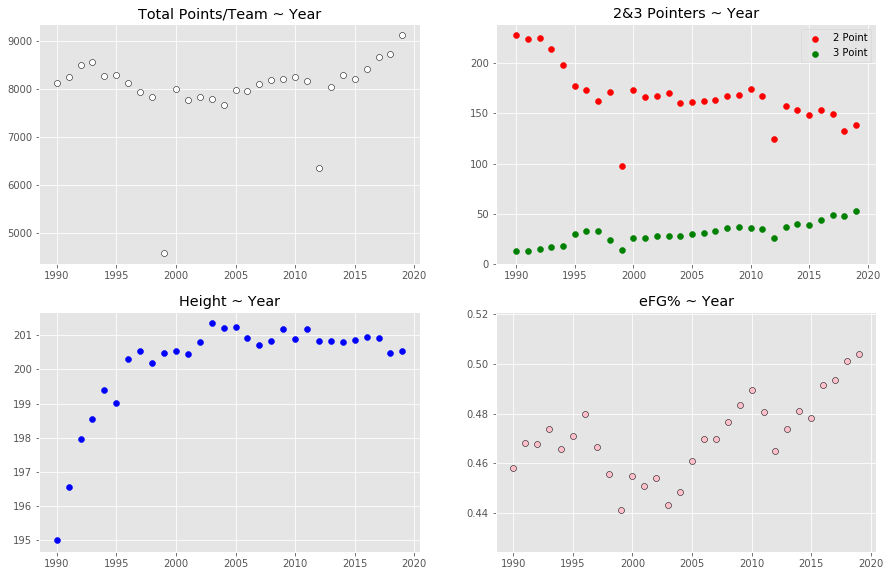

In [14]:
plt.figure(figsize=(15, 15))

plt.subplot(321)
plt.title('Total Points/Team ~ Year')
plt.scatter(years.index, years['Points/Teams'] ,color='white', label="data", linewidths=0.5, edgecolors='black');
plt.plot()

# years['Total Points'].plot()

plt.subplot(322)

plt.title('2&3 Pointers ~ Year')
plt.scatter(years.index, years['2 Pointers/Player'] ,color='red', label="data");
plt.scatter(years.index, years['3 Pointers/Player'] ,color='green', label="data");
plt.legend(('2 Point', '3 Point'))
plt.plot()

plt.subplot(323)

plt.title('Height ~ Year')
plt.scatter(years.index, years['Height'] ,color='blue', label="data");
plt.plot()

plt.subplot(324)
plt.title('eFG% ~ Year')
plt.scatter(years.index, years['eFG%'] ,color='pink', label="data", linewidths=0.5, edgecolors='black');
plt.plot()

# plt.subplot(325)
# plt.title('2 Pointer ~ Player')
# plt.scatter(years.index, years['2 Pointers/Player'] ,color='green', label="data");
# plt.scatter(years.index, years['3 Pointers/Player'] ,color='blue', label="data");
# plt.plot(linewidth=2.0)

## 3 Pointers

In [15]:
regularTotSeason.columns

Index(['ID', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PIR'],
      dtype='object')

In [16]:
regularTotSeasonCopy = regularTotSeason
regularTotSeasonCopy = regularTotSeasonCopy.sort_values('3P', ascending=False)
regularTotSeasonCopy = regularTotSeasonCopy[['Player', 'Year', '3P', '3P%']]
# regularTotSeasonCopy.index = (regularTotSeasonCopy['Player'])
regularTotSeasonCopy.Player = regularTotSeasonCopy.Player.astype(str)
# for x in range(0, 101):
#     regularTotSeasonCopy['Player'].values[x] = regularTotSeasonCopy['Player'] + '(' + (str)(regularTotSeasonCopy['Year'].values[x]) + ')'
regularTotSeasonCopy = regularTotSeasonCopy.drop_duplicates(subset = 'Year', keep='first')
regularTotSeasonCopy = regularTotSeasonCopy.reset_index()
regularTotSeasonCopy

,index,Player,Year,3P,3P%
0,14686,Stephen Curry,2016,402,0.454
1,16289,James Harden,2019,378,0.368
2,15155,Stephen Curry,2017,324,0.411
3,14201,Stephen Curry,2015,286,0.443
4,13235,Stephen Curry,2013,272,0.453
5,9958,Ray Allen,2006,269,0.412
6,5896,Dennis Scott,1996,267,0.425
7,15737,James Harden,2018,265,0.367
8,13718,Stephen Curry,2014,261,0.424
9,11217,Jason Richardson,2008,243,0.406


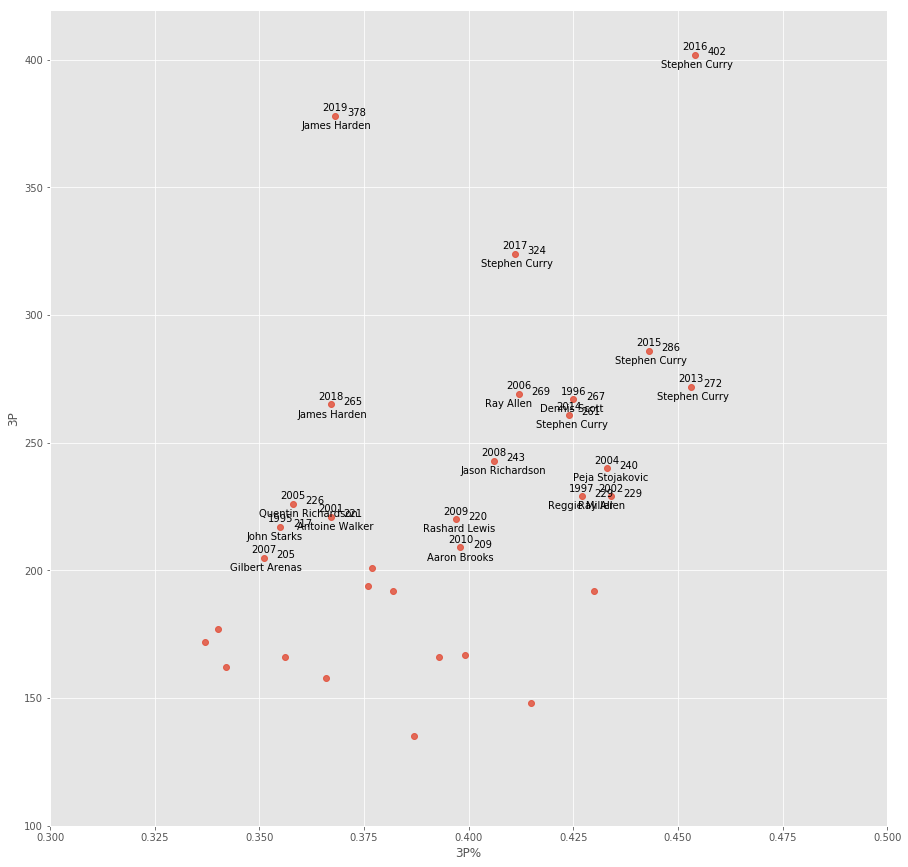

In [17]:
plt.rcParams['figure.figsize'] = (15, 15) 
plot = sns.regplot(x=regularTotSeasonCopy["3P%"], y=regularTotSeasonCopy["3P"], fit_reg=False)
plot.set(ylim=(100, None))
plot.set(xlim=(0.3, 0.5))
for line in range(0,regularTotSeasonCopy[regularTotSeasonCopy['Year']>2000].shape[0]):
    plot.text(regularTotSeasonCopy['3P%'][line]-0.008, regularTotSeasonCopy['3P'][line]-5, regularTotSeasonCopy['Player'][line], horizontalalignment='left', size='medium', color='black')
    plot.text(regularTotSeasonCopy['3P%'][line]-0.003, regularTotSeasonCopy['3P'][line]+2, regularTotSeasonCopy['Year'][line], horizontalalignment='left', size='medium', color='black')
    plot.text(regularTotSeasonCopy['3P%'][line]+0.003, regularTotSeasonCopy['3P'][line], regularTotSeasonCopy['3P'][line], horizontalalignment='left', size='medium', color='black')

In [20]:
center = totalDBSeason[totalDBSeason['Pos'] == 'C']
center = center[center['Ht(cm)'] != 0]
powerF = totalDBSeason[totalDBSeason['Pos'] == 'PF']
powerF = powerF[powerF['Ht(cm)'] != 0]
smallF = totalDBSeason[totalDBSeason['Pos'] == 'SF']
smallF = smallF[smallF['Ht(cm)'] != 0]
shootingG = totalDBSeason[totalDBSeason['Pos'] == 'SG']
shootingG = shootingG[shootingG['Ht(cm)'] != 0]
pointG = totalDBSeason[totalDBSeason['Pos'] == 'PG']
pointG = pointG[pointG['Ht(cm)'] != 0]
pointG.head()

,ID,Year,Player,Pos,Age,Tm,G,GS,MP,FG,...,Rookie,All 1st,All 2nd,All 3rd,All Tot,All-Star,D Tot,D 1st,D 2nd,Total Awards
298,brittda01,1981,Dave Britton,PG,22,WSB,2,NaN,9,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
337,cookda01,1982,Darwin Cook,PG,23,NJN,82,17.0,2090,387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
338,cookda01,1983,Darwin Cook,PG,24,NJN,82,47.0,2625,443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
339,cookda01,1984,Darwin Cook,PG,25,NJN,82,31.0,1870,304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
340,cookda01,1985,Darwin Cook,PG,26,NJN,58,9.0,1063,212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# decbribeC = center.describe(include='all')
# decbribePF = powerF.describe(include='all')
# decbribeSF = smallF.describe(include='all')
# decbribeSG = shootingG.describe(include='all')
# decbribePG = pointG.describe(include='all')

In [22]:
tableC = getTable(center)
tableC

,Year,Players,Age,Teams,Height,Points/Teams,3 Pointers/Player,2 Pointers/Player,eFG%
Year,,,,,,,,,
1990.0,1990.0,67.0,26.836,27.0,212.223,1220.444,1.910448,191.014925,0.464776
1991.0,1991.0,70.0,27.114,27.0,212.453,1236.000,0.957143,188.100000,0.464101
1992.0,1992.0,72.0,27.208,27.0,212.619,1161.667,1.361111,171.472222,0.466757
1993.0,1993.0,72.0,27.611,27.0,211.949,1247.148,1.263889,180.513889,0.481097
1994.0,1994.0,83.0,26.795,27.0,212.013,1383.519,0.891566,176.506024,0.467537
1995.0,1995.0,74.0,27.554,27.0,212.262,1427.815,3.324324,199.418919,0.468541
1996.0,1996.0,81.0,27.506,28.0,212.106,1277.429,1.827160,171.938272,0.480111
1997.0,1997.0,88.0,28.114,29.0,211.859,1195.207,2.488636,152.670455,0.463102
1998.0,1998.0,85.0,28.094,29.0,211.746,1344.172,1.505882,178.800000,0.455702


[]

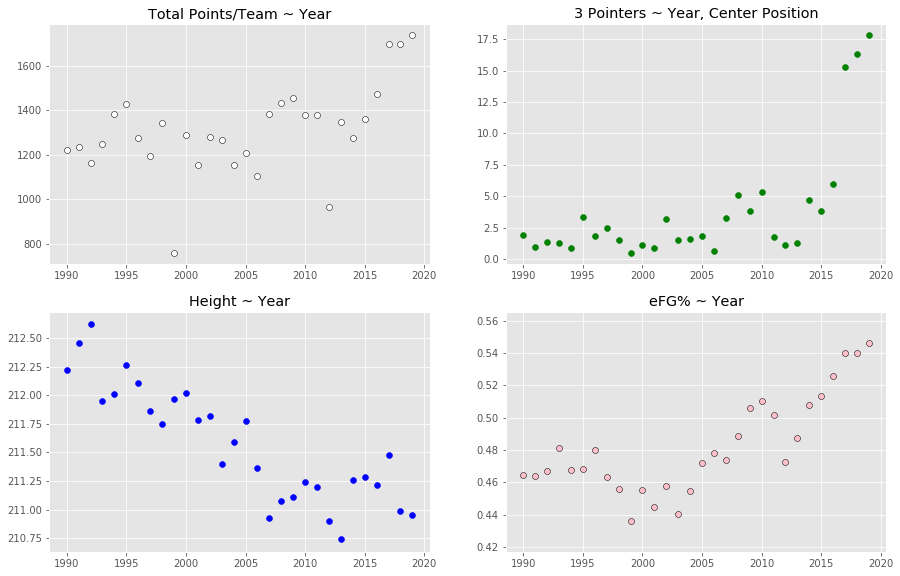

In [26]:
plt.figure(figsize=(15, 15))

plt.subplot(321)
plt.title('Total Points/Team ~ Year')
plt.scatter(tableC.index, tableC['Points/Teams'] ,color='white', label="data", linewidths=0.5, edgecolors='black');
plt.plot()

# tableSF['Total Points'].plot()

plt.subplot(322)

plt.title('3 Pointers ~ Year, Center Position')
# plt.scatter(tableC.index, tableC['2 Pointers/Player'] ,color='red', label="data");
plt.scatter(tableC.index, tableC['3 Pointers/Player'] ,color='green', label="data");
# plt.legend(('2 Point', '3 Point'))
plt.plot()

plt.subplot(323)

plt.title('Height ~ Year')
plt.scatter(tableC.index, tableC['Height'] ,color='blue', label="data");
plt.plot()

plt.subplot(324)
plt.title('eFG% ~ Year')
plt.scatter(tableC.index, tableC['eFG%'] ,color='pink', label="data", linewidths=0.5, edgecolors='black');
plt.plot()

# plt.subplot(325)
# plt.title('2 Pointer ~ Player')
# plt.scatter(tableSF.index, tableSF['2 Pointers/Player'] ,color='green', label="data");
# plt.scatter(tableSF.index, tableSF['3 Pointers/Player'] ,color='blue', label="data");
# plt.plot(linewidth=2.0)